In [2]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
Data_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
Data_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
Data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
Data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
Data_train.shape

(8523, 12)

In [5]:
Data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

missing values found in Outlet_size and Item_weight column. Needs to be treated

In [6]:
Data_train.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
Data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
Data_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [9]:
Data_train.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
Data_train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [11]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Few columns that have object data types which needs to be encoded

In [12]:
Data_train[Data_train["Item_Identifier"].duplicated()].count()

Item_Identifier              6964
Item_Weight                  5755
Item_Fat_Content             6964
Item_Visibility              6964
Item_Type                    6964
Item_MRP                     6964
Outlet_Identifier            6964
Outlet_Establishment_Year    6964
Outlet_Size                  5010
Outlet_Location_Type         6964
Outlet_Type                  6964
Item_Outlet_Sales            6964
dtype: int64

There are duplicate Item identifiers but other cell combinations vary. so ideally no duplicates to be dropped.

<AxesSubplot:>

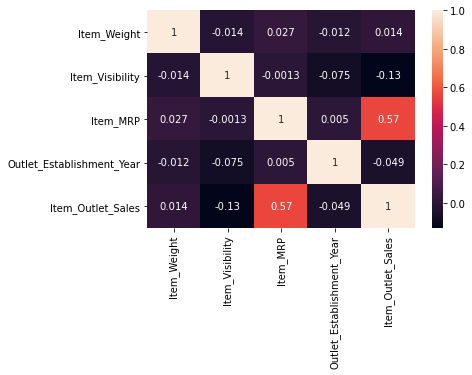

In [13]:
sns.heatmap(Data_train.corr(),annot=True)

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda

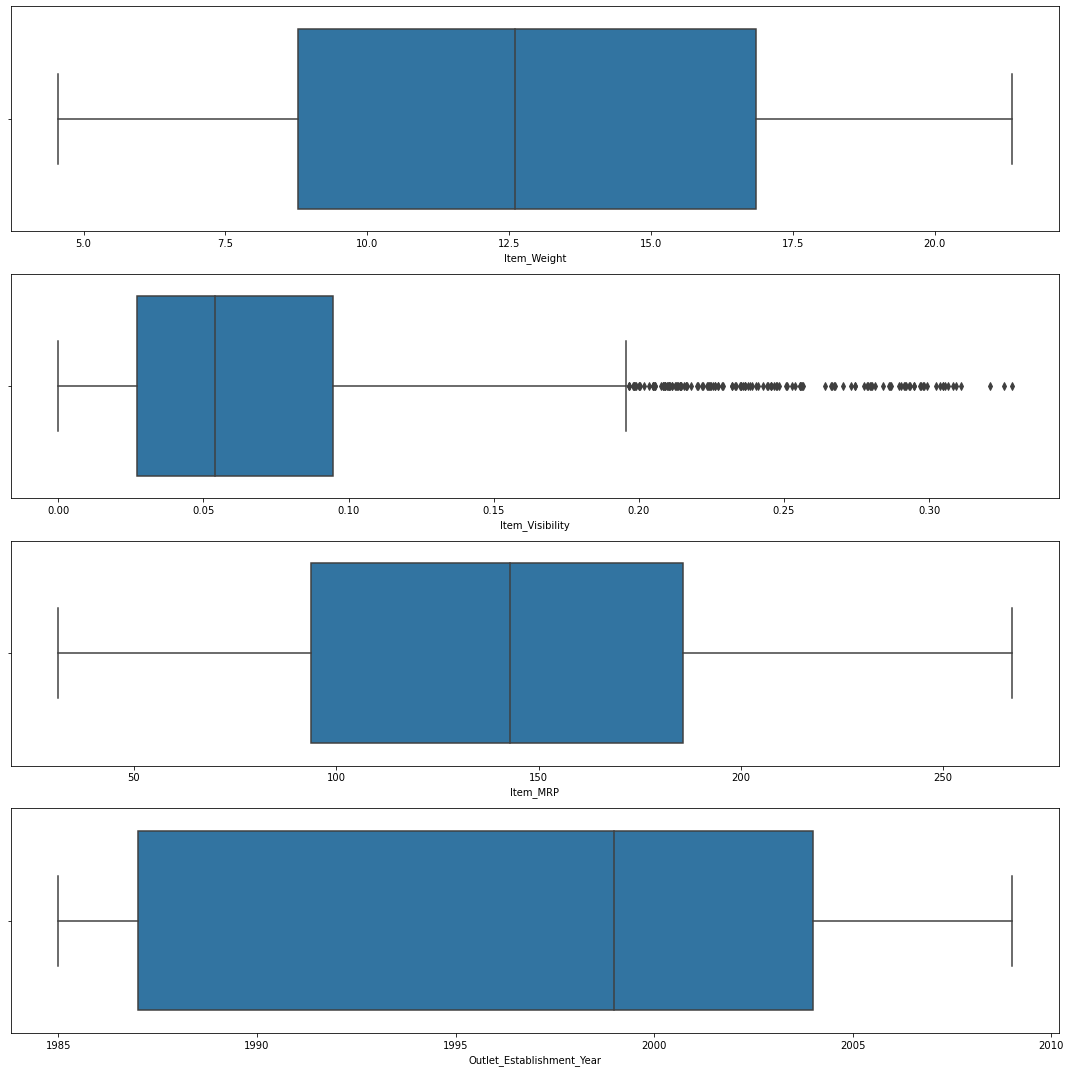

In [14]:
fig, axs = plt.subplots(4, figsize = (15,15))
plt1 = sns.boxplot(Data_train['Item_Weight'], ax = axs[0])
plt2 = sns.boxplot(Data_train['Item_Visibility'], ax = axs[1])
plt3 = sns.boxplot(Data_train['Item_MRP'], ax = axs[2])
plt4 = sns.boxplot(Data_train['Outlet_Establishment_Year'], ax = axs[3])
plt.tight_layout()

Outliers in Item Visibility columns and needs to be treated

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

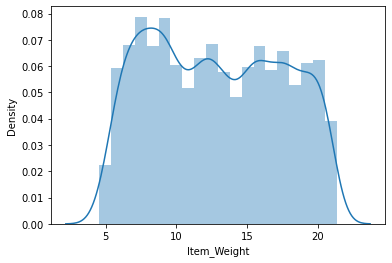

In [15]:
sns.distplot(Data_train["Item_Weight"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

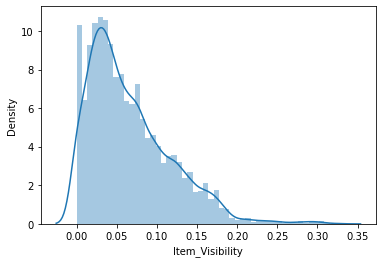

In [16]:
sns.distplot(Data_train["Item_Visibility"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

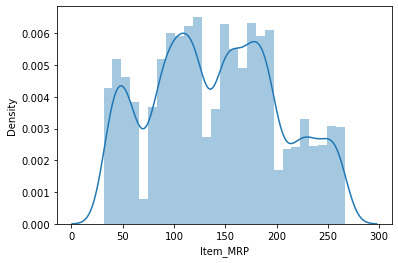

In [17]:
sns.distplot(Data_train["Item_MRP"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

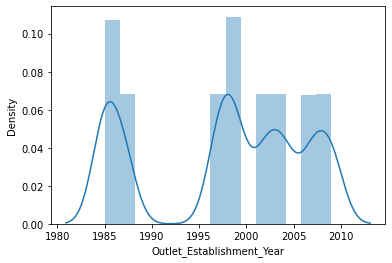

In [18]:
sns.distplot(Data_train["Outlet_Establishment_Year"])

# Encoding the object datatypes using Label encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in Data_train.columns:
    if Data_train[i].dtypes=="object":
        Data_train[i]=enc.fit_transform(Data_train[i].values.reshape(-1,1))
Data_train

C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [20]:
Data_train["Outlet_Size"].fillna(Data_train["Outlet_Size"].mode()[0],inplace=True)

In [21]:
Data_train["Item_Weight"].fillna(Data_train["Item_Weight"].mean(),inplace=True)

In [22]:
Data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
Data_train.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Treating Outliers

In [24]:
from scipy.stats import zscore
z=zscore(Data_train)
z

array([[-1.38851383, -0.84187169, -0.73814723, ..., -1.36933384,
        -0.25265831,  0.910601  ],
       [-1.71799137, -1.64170589,  1.35474328, ...,  1.09156913,
         1.00297245, -1.01844035],
       [-0.26205684,  1.09855449, -0.73814723, ..., -1.36933384,
        -0.25265831, -0.04923754],
       ...,
       [ 1.28515188, -0.53424315, -0.73814723, ..., -0.13888236,
        -0.25265831, -0.57909963],
       [-0.21975905, -1.33644372,  1.35474328, ...,  1.09156913,
         1.00297245, -0.19672492],
       [-1.62449099,  0.45963367, -0.73814723, ..., -1.36933384,
        -0.25265831, -0.82959407]])

In [25]:
pd.DataFrame(z).head(50)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.388514,-8.418717e-01,-0.738147,-0.970732,-0.766479,1.747454,1.507813,0.139541,-0.744458,-1.369334,-0.252658,0.910601
1,-1.717991,-1.641706e+00,1.354743,-0.908111,1.608963,-1.489023,-0.607071,1.334103,-0.744458,1.091569,1.002972,-1.018440
2,-0.262057,1.098554e+00,-0.738147,-0.956917,0.658786,0.010040,1.507813,0.139541,-0.744458,-1.369334,-0.252658,-0.049238
3,0.759769,1.500838e+00,1.354743,-1.281758,-0.291391,0.660050,-1.664513,0.020085,1.277535,1.091569,-1.508289,-0.849103
4,1.151580,-9.294275e-01,-0.738147,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-1.755454,1.091569,-0.252658,-0.695373
5,-0.048342,-5.827538e-01,1.354743,-1.281758,-1.716656,-1.438734,-0.607071,1.334103,-0.744458,1.091569,1.002972,-0.952110
6,-0.186366,1.875007e-01,1.354743,-1.034813,1.371418,-1.338238,-1.312032,-1.293934,-1.755454,1.091569,-0.252658,-1.076967
7,-0.092866,4.035383e-14,-0.738147,1.188838,1.371418,-0.533641,0.097891,-1.532846,-0.744458,1.091569,2.258603,1.079158
8,-0.756273,7.909259e-01,1.354743,-0.958331,-0.528935,-0.706908,0.802852,0.497909,1.277535,-0.138882,-0.252658,-0.647381
9,0.468137,1.500838e+00,1.354743,0.548845,-0.528935,0.752008,-0.959551,1.095190,1.277535,-0.138882,-0.252658,1.482212


In [26]:
Data_train1=Data_train[(z<3).all(axis=1)]
Data_train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [27]:
Data_loss=((8523-8222)/8523)*100
Data_loss

3.5316203214830457

# Splitting DF AND Treating Skewness 

In [28]:
Data_train1.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.130159
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

In [29]:
x=Data_train1.iloc[:,:-1]
y=Data_train1.iloc[:,-1]


In [30]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\Pradeep\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Pradeep\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5160291473971531
At random state 0,the testing accuracy is:- 0.5052530340528378


At random state 1,the training accuracy is:- 0.5124103335833416
At random state 1,the testing accuracy is:- 0.5203643746061684


At random state 2,the training accuracy is:- 0.5136499089227486
At random state 2,the testing accuracy is:- 0.5139147427847734


At random state 3,the training accuracy is:- 0.5185597057483062
At random state 3,the testing accuracy is:- 0.4959327291897788


At random state 4,the training accuracy is:- 0.5093948196085278
At random state 4,the testing accuracy is:- 0.5295835045465616


At random state 5,the training accuracy is:- 0.5165198209612171
At random state 5,the testing accuracy is:- 0.5017655781606345


At random state 6,the training accuracy is:- 0.5178135070387562
At random state 6,the testing accuracy is:- 0.49903011140141573


At random state 7,the training accuracy is:- 0.5171395876059857
At random state 7,the testing ac

At random state 71,the testing accuracy is:- 0.488434427739317


At random state 72,the training accuracy is:- 0.5161233494189665
At random state 72,the testing accuracy is:- 0.5051323235465246


At random state 73,the training accuracy is:- 0.5139443483163807
At random state 73,the testing accuracy is:- 0.5144060684961712


At random state 74,the training accuracy is:- 0.5185242601603139
At random state 74,the testing accuracy is:- 0.49592438164497543


At random state 75,the training accuracy is:- 0.5182696921772918
At random state 75,the testing accuracy is:- 0.4971743225444588


At random state 76,the training accuracy is:- 0.512154241211123
At random state 76,the testing accuracy is:- 0.5204882599751732


At random state 77,the training accuracy is:- 0.5097103897629026
At random state 77,the testing accuracy is:- 0.5321873785005184


At random state 78,the training accuracy is:- 0.5165884655397825
At random state 78,the testing accuracy is:- 0.5026498996211659


At random state 79

<AxesSubplot:>

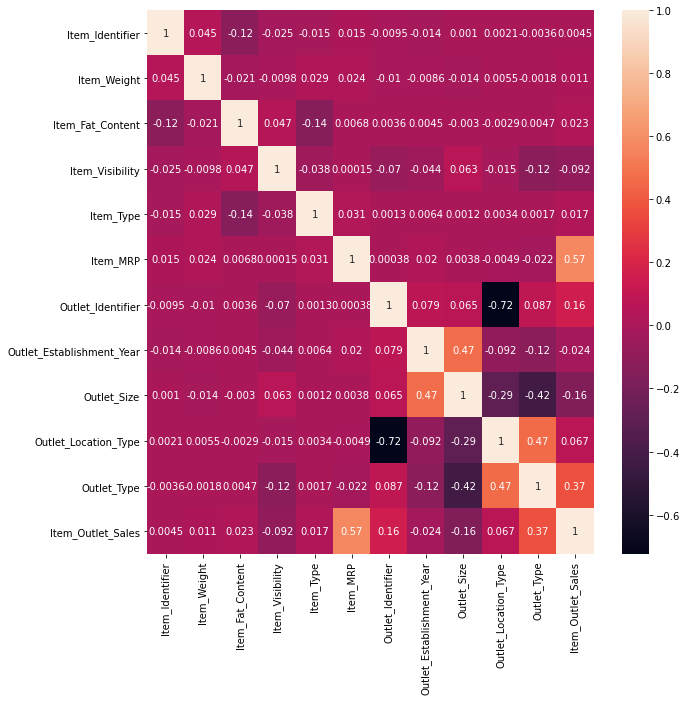

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(Data_train1.corr(),annot=True)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=95)

In [35]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.5186481580235884


In [36]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.5112920249930496 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 3 the cv score is 0.5121430611926657 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 4 the cv score is 0.511665265072291 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 5 the cv score is 0.5122431174767297 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 6 the cv score is 0.5122102738369126 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 7 the cv score is 0.5126716568656212 and accuracy score for training is -0.504677122180927 and accuracy for the testing is 0.5186481580235884


At cross fold 8 the cv score is 0.5122467550099907 an

Choosing CV=7

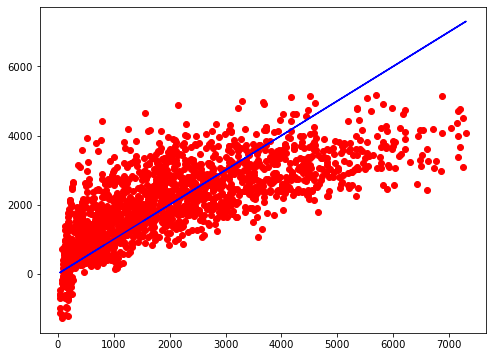

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[95],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 1, 'precompute': True, 'random_state': 95, 'selection': 'random'}


In [40]:
Las = Lasso(alpha=1,random_state=95,precompute=True,selection="random")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.5186866979405457

In [41]:
cvscore=cross_val_score(Las,x,y,cv=7)
cvmean=cvscore.mean()
cvmean

0.5127314240468276

In [42]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[95]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt', 'random_state': 95, 'splitter': 'best'}


In [43]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',random_state=95,max_features='sqrt')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 19.772201739219362
Cross Val Score: 14.579968249180475


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[95]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt', 'random_state': 95}


In [74]:
rf= RandomForestRegressor(criterion="mae",max_features="sqrt",random_state=95)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=3)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 56.66563958129457
Cross Val Score: 56.75358426423291


From this we could conclude that Random Forest is the best fit algorithm

In [75]:
import pickle
filename = 'bdm.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [76]:
import numpy as np
a=np.array(y_test)
a

array([1531.34  , 2768.3964, 1054.6272, ..., 2167.8448,  577.9144,
        824.9262])

In [77]:
predicted=np.array(rf.predict(x_test))
predicted

array([1223.001362, 2454.078878, 1514.435338, ..., 1745.341436,
       1488.202818, 1844.978406])

In [51]:
Data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [52]:
Data_test.shape

(5681, 11)

In [53]:
Data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [55]:
Data_test["Outlet_Size"].fillna(Data_test["Outlet_Size"].mode()[0],inplace=True)
Data_test["Item_Weight"].fillna(Data_test["Item_Weight"].mean(),inplace=True)

In [56]:
Data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [57]:
Data_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [62]:
Data_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [63]:
Data_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [64]:
Data_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in Data_test.columns:
    if Data_test[i].dtypes=="object":
        Data_test[i]=enc.fit_transform(Data_test[i].values.reshape(-1,1))
Data_test

C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


In [66]:
Data_test.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform
x=power_transform(Data_test,method='yeo-johnson')

C:\Users\Pradeep\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Pradeep\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [70]:
Data_test=pd.DataFrame(x,columns=Data_test.columns)


In [71]:
Data_test.skew()

Item_Identifier             -0.285982
Item_Weight                 -0.060915
Item_Fat_Content             0.609223
Item_Visibility              0.116776
Item_Type                   -0.167431
Item_MRP                    -0.111040
Outlet_Identifier           -0.214064
Outlet_Establishment_Year   -0.200515
Outlet_Size                 -0.042981
Outlet_Location_Type        -0.220642
Outlet_Type                  0.007830
dtype: float64

In [72]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

In [78]:
predict_Data_test = rf.predict(x)

In [79]:
predict_Data_test

array([1641.336818, 1340.718131, 1355.072779, ..., 1849.45924 ,
       3757.835122, 1387.324131])